<a href="https://colab.research.google.com/github/jjennings955/CSE5368-Spring-2019/blob/master/Overfitting_and_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

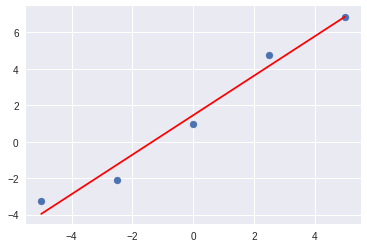

In [0]:
#@title Fitting a line with polynomial
num_samples = 5 #@param {type:"integer"}
seed = 0 #@param {type:"integer"}
polynomial_degree = 1 #@param {type:"integer"}
np.random.seed(seed)
x = np.linspace(-5,5, num_samples)
y = x + np.random.randn(num_samples) # create the line y = x + noise
z = np.polyfit(x, y, polynomial_degree)
p = np.poly1d(z)
plt.scatter(x,y);
plt.plot(x,p(x), 'r');

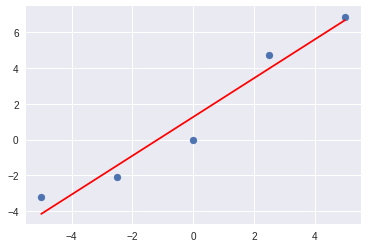

In [0]:
# Linear Regression with Outliers
#@title Linear Regression with Outliers
num_samples = 5 #@param {type:"integer"}
seed = 0 #@param {type:"integer"}
polynomial_degree = 1 #@param {type:"integer"}
outlier_magnitude = 0 #@param {type:"integer"}
np.random.seed(seed)
x = np.linspace(-5,5, num_samples)
y = x + np.random.randn(num_samples)
y[num_samples//2] = outlier_magnitude
z = np.polyfit(x, y, polynomial_degree)
p = np.poly1d(z)
plt.scatter(x,y);
plt.plot(x,p(x), 'r');

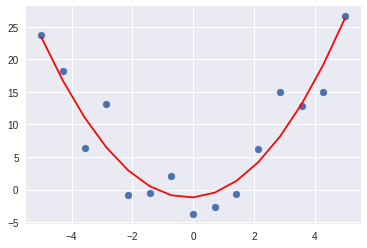

In [0]:
#@title Fitting a Parabola
num_samples = 15 #@param {type:"integer"}
seed = 2 #@param {type:"integer"}
polynomial_degree = 2 #@param {type:"integer"}
np.random.seed(seed)
x = np.linspace(-5,5, num_samples)
y = x**2 + np.random.randn(num_samples)*3
z = np.polyfit(x, y, polynomial_degree)
p = np.poly1d(z)
plt.scatter(x,y);
plt.plot(x,p(x), 'r');



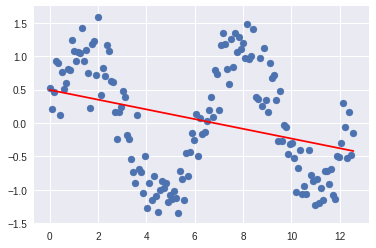

In [0]:
#@title Fitting a sin wave with a polynomial
num_samples = 15 #@param {type:"integer"}
seed = 0 #@param {type:"integer"}
polynomial_degree = 1 #@param {type:"integer"}
np.random.seed(seed)
x = np.linspace(0,4*3.14, num_samples)
y = np.sin(x) + np.random.randn(num_samples)*0.3
z = np.polyfit(x, y, polynomial_degree)
p = np.poly1d(z)
plt.scatter(x,y);
plt.plot(x,p(x), 'r');


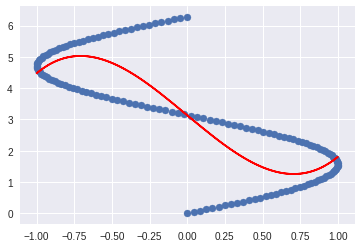

In [0]:
#@title Trying to fit a multimodal function
num_samples = 150 #@param {type:"integer"}
seed = 0 #@param {type:"integer"}
polynomial_degree = 4 #@param {type:"integer"}
np.random.seed(seed)
theta = np.linspace(0,2*3.14, num_samples)

x = np.sin(theta)

z = np.polyfit(x, theta, polynomial_degree)
p = np.poly1d(z)

plt.scatter(x,theta);
plt.plot(x,p(x), 'r');


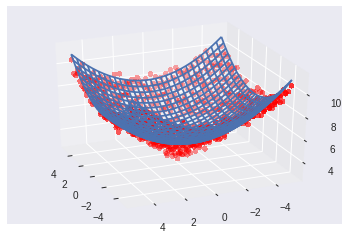

In [0]:
#@title Fitting a parabolic surface
num_samples = 30 #@param {type:"integer"}
seed = 3 #@param {type:"integer"}
viewing_angle = 157 #@param {type:"slider", min:0, max:360, step:1}
polynomial_degree = 3 #@param {type:"integer"}

%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

np.random.seed(seed)
# Make data.
X = np.linspace(-5, 5, num_samples)
X, Y = np.meshgrid(X, X)
xy = np.hstack([X.reshape(-1, 1),Y.reshape(-1, 1)])
poly = PolynomialFeatures(polynomial_degree)
x_poly = poly.fit_transform(xy)
model = LinearRegression()
Z = np.sqrt(X**2 + Y**2) + 3 + np.random.randn(*X.shape)*0.3
model.fit(x_poly, Z.ravel())
ax.view_init(30, viewing_angle)
# Plot the surface.
fit = ax.plot_wireframe(X, Y, np.dot(model.coef_, x_poly.T).reshape(X.shape) + model.intercept_)
surf = ax.scatter(X, Y, Z, color='red',
                       linewidth=0, antialiased=False)
